# 3.2 Introduction to Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

## 1. Keras, TensorFlow, Theano, and CNTK

Keras is a model-level library, providing high-level building blocks for developing deep-learning models. It does not handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the backend engine of Keras. TensorFlow, Theano, and CNTK are the three backend options.

*   **TensorFlow:** An open-source library developed by Google for numerical computation using data flow graphs. It is currently the most popular backend for Keras.
*   **Theano:** An open-source library developed by the MILA group at the University of Montreal. It is one of the pioneers in deep learning libraries.
*   **CNTK:** The Microsoft Cognitive Toolkit (CNTK) is a deep-learning framework developed by Microsoft.

Keras acts as an interface to these backend libraries, providing a user-friendly and consistent API for building and training neural networks. This abstraction allows users to switch between backends with minimal code changes.

**Example:**

Let's look at how Keras uses the backend for a simple operation like matrix multiplication.

In Keras, you would use `keras.backend.dot(x, y)` which would then call the appropriate dot product function from the configured backend (TensorFlow, Theano, or CNTK).

Mathematically, matrix multiplication is defined as:

$C_{ij} = \sum_{k} A_{ik} B_{kj}$

Where A and B are matrices and C is their product.

In [ ]:
import numpy as np
import keras.backend as K
import tensorflow as tf # Import TensorFlow

# Example matrices
# Use the backend's variable creation method (TensorFlow in this case)
x = tf.Variable(np.random.random((3, 2)), dtype=tf.float32)
y = tf.Variable(np.random.random((2, 4)), dtype=tf.float32)


# Perform matrix multiplication using Keras backend dot operation (or backend equivalent)
# K.dot is deprecated, use backend.dot or the backend's matmul
z = tf.matmul(x, y)

# Use the backend's shape method
print("Matrix x shape:", tf.shape(x))
print("Matrix y shape:", tf.shape(y))
print("Result z shape:", tf.shape(z))

# In a real scenario, you would typically work with layers, not raw tensor operations like this.
# This is just to illustrate how Keras uses the backend for fundamental operations.

Matrix x shape: tf.Tensor([3 2], shape=(2,), dtype=int32)
Matrix y shape: tf.Tensor([2 4], shape=(2,), dtype=int32)
Result z shape: tf.Tensor([3 4], shape=(2,), dtype=int32)


## 2. Developing with Keras

Developing with Keras is typically done by defining a model, configuring its layers, compiling the model, and then training it on data.

### Model Definition

Keras offers two main ways to define a model:

*   **Sequential API:** Used for linear stacks of layers. This is the simplest way to build models.
*   **Functional API:** Used for more complex models with multiple inputs, multiple outputs, and shared layers.

#### Sequential API Example

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define input layer
input_tensor = Input(shape=(100,))

# Define hidden layers
x = Dense(units=64, activation='relu')(input_tensor)
output_tensor = Dense(units=10, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Assuming you have your data loaded into x_train and y_train
# model.fit(x_train, y_train, epochs=10, batch_size=32)

In [ ]:
# Assuming you have your test data loaded into x_test and y_test
# loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
# print('Test accuracy:', accuracy)

In [ ]:
# Assuming you have new data loaded into x_new
# predictions = model.predict(x_new)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.8799999952316284


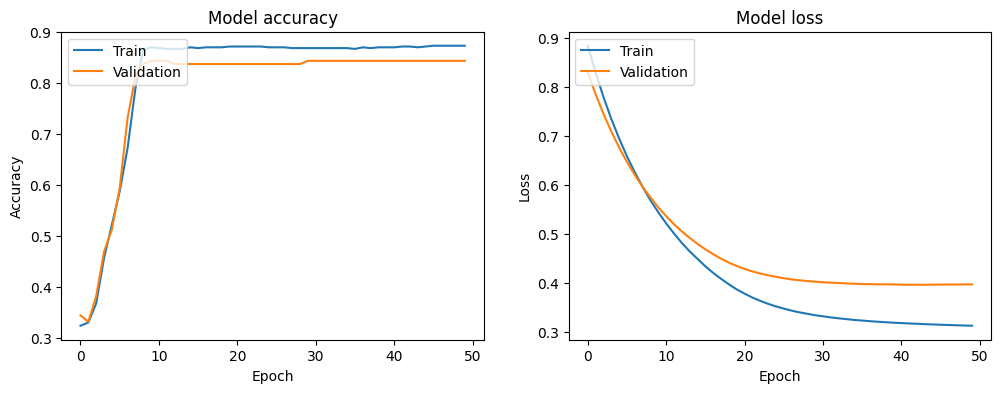

6481/6481 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


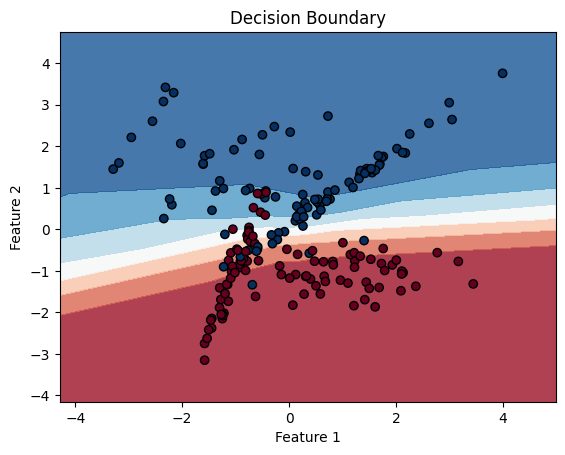

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Visualize the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Visualize the decision boundary (optional, for 2D data)
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_test, y_test, model)

## Summary and Conclusion

This notebook introduced Keras, a high-level neural networks API that can run on top of different backend engines like TensorFlow. We explored how Keras acts as an interface to these backends, simplifying the process of building and training neural networks.

We also demonstrated how to define models using both the Sequential and Functional APIs in Keras. The Sequential API is suitable for linear stacks of layers, while the Functional API provides more flexibility for complex model architectures.

Finally, we walked through a complete example of building, compiling, training, and evaluating a simple neural network using Keras with synthetic data. This included visualizing the training history (accuracy and loss) and the decision boundary for a 2D classification problem.

In conclusion, Keras provides a user-friendly and efficient way to develop deep learning models, allowing for rapid experimentation and iteration. Its abstraction over different backend engines makes it a versatile tool for researchers and developers alike.